## CS 506 Spring 2021 - HW2 
### Classification and Dimensionality Reduction (Total: 32 points)
#### Package Limitations: None

#### Name:Yufan Lin
#### BU ID:U16678507
#### BU Email:eric1025@bu.edu

#### People you consulted working on this hw:





### 1. Least Squares and Logistic Regression

In this section, we are going to compare two linear models for classification, especially when outliers are presented in the data. Please refer to Section 4.1.3 at Page 184 of the book [Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf) for the context of this problem as well as the explanation of Figure1

Figure 1: The comparison of least square and logistic regression in classification of two classes with/without outliers

![Figure 1](figure_1.png "some titile")

a) \[1 pt.\] Generate labeled random 2D points like the ones shown in the left subfigure of Figure1. Note that the red crosses and blue circles are points of different classes, so you may need to have a third column storing the label info of the 2D points. Let’s call this data “data without outlier”. Now on top of this data, add a few outliers to the blue circles just like the right subfigure of Figure1 and save the data as “data with outlier”. You may either use code or even manually choose some random 2D points. Your data need not to be exactly the same as the ones shown on the plots.

In [113]:
# feel free to write more helper function, but do NOT change the name of the provided function(s). 
# you may modify inputs and outputs of provided functions. If you do, make sure to indicate
# what the they are in the function docstring. This applies to every cells below


from typing import List, Dict, Tuple
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
def generate_random_points(points,label,with_outlier: bool):                
#add the points and labels to the parameter, so my thought is to first create a random data of points
#and labels without outliers and then add the outliers to the same data as if needed

#     """
#     Generate a few random points and return such dataset
    
#     :param with_outlier: whether outlier is generated with the data points
#     :return: points and label

    
    if with_outlier == True:
        x_outliers=np.random.uniform(6,8,5)                       #create x and y coordinates for outliers and append to x and y
        y_outliers=np.random.uniform(6,8,5)
        outliers=np.stack((x_outliers,y_outliers),axis=-1)
        points=np.vstack((points,outliers))
        label=np.append(label,np.ones(5))                           #set the labels for outliers to 1
    return points,label

In [114]:
# Do some test print outs to verify correctness
points,labels=make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
# print(generate_random_points(points,labels,with_outlier=False))
# print(generate_random_points(points,labels,with_outlier=True))
# count=0
points,labels=generate_random_points(points,labels,with_outlier=False)
print(points,labels)
# for i in range(len(labels)):
#     if(labels[i]== 0):
#         count=count+1
# print(count)


[[ 0.0224531  -1.0571394 ]
 [-0.99230404  1.32514336]
 [-1.01321815  0.95709117]
 [-0.95495309 -0.88835184]
 [ 0.19832091 -0.74542941]
 [-0.1336218  -1.04562336]
 [ 1.2108986  -0.93137601]
 [ 0.38958207  1.22882607]
 [-0.43052404  0.800233  ]
 [-0.27295749  0.64314705]
 [-0.03768504 -1.08785027]
 [ 1.0701784  -0.99870076]
 [ 1.11754883  0.82722533]
 [ 0.51735902  0.69402961]
 [ 1.84042159 -0.91036882]
 [-0.52224075 -0.87203589]
 [-0.80024602  1.21185179]
 [ 0.58352074  0.79482199]
 [-0.60933109  1.49701097]
 [ 0.0588182  -0.89256681]
 [ 0.25660143 -0.91806797]
 [-0.8169323  -0.94830186]
 [ 0.13743571 -1.0430395 ]
 [ 0.36643673  0.69419848]
 [ 0.28075866  0.97134673]
 [ 1.64365767  0.80296768]
 [-1.09721183  0.82521405]
 [ 0.69626347 -0.86932236]
 [ 0.35589628 -0.9858324 ]
 [ 0.30249042  1.16824324]
 [-0.39586795  1.10303543]
 [ 0.76619156 -1.01333204]
 [ 0.52318414  1.12944779]
 [ 0.64149091  0.90699516]
 [-1.7941899  -0.95964415]
 [-0.13503236  1.10875956]
 [ 0.93608515 -1.05951975]
 

b) \[4 pts.\] Use both the least squares method and the logistic regression method to classify the “data without outlier” and “data with outlier”.

In [158]:
import sklearn.linear_model
from sklearn import linear_model
import numpy as np
def least_squares_classify(points,labels):     #Changed the parameters to np arrays of points and labels which is created in 1(a)
    """
    Classifying dataset with least squares method
    
    :param dataset: the dataset object to classify
    :return: coefficient and constant for decision boundary
    """
    model = linear_model.LinearRegression()                     #fit the model and find the decision boundary
    model.fit(points,labels)
    a = model.intercept_
    w1,w2=model.coef_.T
    k=-w1/w2
    b=-a
    return k,b

def logic_regression_classify(points,labels):             #same as the parameters as least_squares_classify
    model = sklearn.linear_model.LogisticRegression()                       #fit the model and find the decision boundary
    model.fit(points,labels)
    a = model.intercept_[0]
    w1,w2=model.coef_.T
    k=-w1/w2
    b=-a/w2

    return k,b


In [162]:
# Classify data with and without outlier here 
points,labels=make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
points1,labels1 = generate_random_points(points,labels,with_outlier=False)   #without outliier
k1,b1=least_squares_classify(points1,labels1)
k2,b2=logic_regression_classify(points1,labels1)
print(k1,b1)
print(k2,b2)

points2,labels2 = generate_random_points(points,labels,with_outlier=True)    #with outlier
k3,b3=least_squares_classify(points2,labels2 )
k4,b4=logic_regression_classify(points2,labels2 )
print(k3,b3)
print(k4,b4)


-33.51228563473468 -0.49989011177496084
[-32.69046582] [8.49714177]
1.988080119525546 -0.4794110354022693
[-32.69040196] [8.49701658]


c) \[2 pts.\] Plot the classification results into two figures side by side just like Figure1. Have you got similar results like Figure1? Explain briefly why the logistic regression is not sensitive to outliers.

In [164]:
import matplotlib.pyplot as plt
def plot_classification_results(points,labels,k1,b1,k2,b2,withoutlier: bool):
    """
    Plot classification results of data with outlier and data without outlier
    
    :param: points and labels, k1,b1 which is the decision boundary for linear regresssion and k2,b2 which is the decision boundary for logistic regression
    :return:   the graph
    """  
    xd=points[:,0]
    yd1=k1*xd+b1                                                #plot the line for linear regression and logistic regression
    yd2=k2*xd+b2
    if(withoutlier== True):
        plt.title('with outlier')
    else:
        plt.title('without outlier')
        
    plt.plot(xd, yd1, label = 'linear')
    plt.plot(xd, yd2, label = 'logistic')
    plt.legend()
    plt.scatter(*points[labels==0].T, s=8, alpha=0.5)           #plot the points
    plt.scatter(*points[labels==1].T, s=8, alpha=0.5)
    plt.xlim(-4, 10)
    plt.ylim(-4, 10)
    plt.show()
    

    

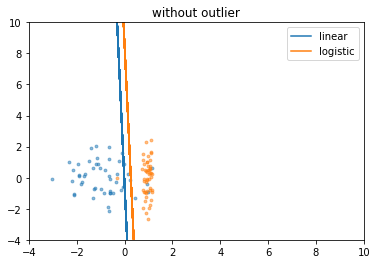

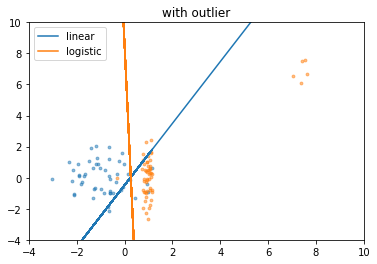

In [165]:
plot_classification_results(points1,labels1,k1,b1,k2,b2,withoutlier=False)
plot_classification_results(points2,labels2,k3,b3,k4,b4,withoutlier=True)

#For logistic regression, decision boundary takes into consideration only the points that are closer to it, 
# hence effect of outliers on the decision boundary is very less. 

### 2 Logistic Regression and kNN Classification

The goal of this problem is to perform classification on the famous MNIST dataset.

We have already preprocessed a sample of this dataset (30% of the original dataset), that you can find here: [Download from Google Drive](https://drive.google.com/open?id=1phX7-hv5FNye7mPzddr1oplZIhAgmycz) in the format of NumPy arrays.

File mnist data.npy contains an array of the data -each row corresponds to a 28 × 28 digit picture vectorized to create 28*28=784 features, while the file mnist labels.npy contains the respective labels of the images.

a) \[0 pts.\] Randomly split the dataset, using 20% of the samples as your test set and the remaining 80% as the train set that you will use to fit your models.

In [119]:
import numpy as np
from sklearn.model_selection import train_test_split
def read_mnist_data(file_path: str) -> np.array:
    """
    Load numpy array of MNIST dataset from data.npy file
    
    :param file_path: string path to dataset 
    :return: numpy array representation of the mnist dataset
    """
    data=np.load(file_path)
    return data
data=read_mnist_data(file_path='C:/Users/dell/Desktop/CS506hw2/mnist_data.npy')
labels=read_mnist_data(file_path='C:/Users/dell/Desktop/CS506hw2/mnist_labels.npy')
X_train, X_test, y_train, y_test= train_test_split(data,labels,test_size=0.2)
# print(data[0])
# print(np.shape(labels))
print(len(X_train))
print(len(X_test))

14400
3600



b) \[2 pts.\] Try to classify the images using Logistic Regression. Have in mind that the dataset contains more than 2 labels, hence is a multinomial classification problem. What is your train accuracy and test accuracy?

In [120]:
def logistic_regression_classify_mnist( X_train, X_test, y_train, y_test) -> Tuple[float, float]: 
    #changed the parameters to the train and test as splited in 2(a)
    """
    Classify mnist dataset with logistic regression
    
    :param dataset: mnist dataset in numpy format
    :return: train and test accuracy of the model
    """
    from sklearn.metrics import accuracy_score                          
    model = sklearn.linear_model.LogisticRegression()                       # fit the model and calculate the train test accuracy using accuracy_score function in sklearn
    model.fit(X_train,y_train)
    X_train_predict=model.predict(X_train)
    X_test_predict=model.predict(X_test)
    train_accuracy=accuracy_score(y_train,X_train_predict)
    test_accuracy=accuracy_score(y_test,X_test_predict)
    return train_accuracy,test_accuracy

In [121]:
train_accuracy,test_accuracy=logistic_regression_classify_mnist(X_train, X_test, y_train, y_test)
print(train_accuracy)
print(test_accuracy)

0.9570833333333333
0.8927777777777778


C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c) \[3 pts.\] Now, try to classify the dataset using a k-Nearest Neighbor classifier. Plot the train and test accuracy as you vary k from 1 to 25 with a step size of 2.


In [122]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
def knn_classify_mnist(X_train, X_test, y_train, y_test):  
    #changed the parameters to the train and test as splited in 2(a),similar to 2(b)
    """
    Classify mnist dataset with K-nearest neighbor
    
    :param dataset: mnist dataset in numpy format
    :return: print the graph of the relationship between k values and accuracy
    """
    L=[x for x in range(1,26)]                      #create the np array of k values from 1 to 25 with a step of 2
    k_value=L[::2]
    train_accuracy = np.empty(len(k_value))
    test_accuracy = np.empty(len(k_value))
    i=0
    for k in (k_value):                                               #store the train_accuracy and test_accuracy for each k value                                                                          
            model=KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train,y_train)
            train_accuracy[i]=accuracy_score(y_train,model.predict(X_train))
            test_accuracy[i]=accuracy_score(y_test,model.predict(X_test))
            i=i+1

    plt.title('kNN: Varying Number of k')
    plt.plot(k_value, test_accuracy, label = 'Testing Accuracy')
    plt.plot(k_value, train_accuracy, label = 'Training Accuracy')
    plt.legend()
    plt.xlabel('k number')
    plt.ylabel('Accuracy')
    plt.show()
    



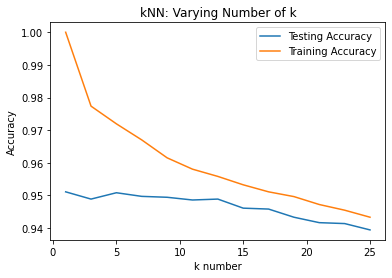

In [123]:

knn_classify_mnist(X_train, X_test, y_train, y_test)


d) \[1 pt.\] Explain your results.


For Training set, as k increases the accuracy first decrease rapidly and then decrease slowly
For Testig set, as k increases the accuracy decreases slowly and sometimes increases but will decrease soon, and as a whole, the tendency of accuracy is decreasing.
The best K values should be 13 which is the point that the accuracy of training and testing data is similar and still at a high rate of accuracy.

e) \[5 pts.\] Now use kNN to explore how a different sized train set affects your results. Plot the accuracy of your model when only using 3,000 of the images in the train set (repeat this experiment using 6,000, 9,000, and so on until you are using the full train set). Use whatever value of k you found that worked best in part (c). You will be doing something similar in Problem 3(d) so it makes sense to run both experiments at the same time.

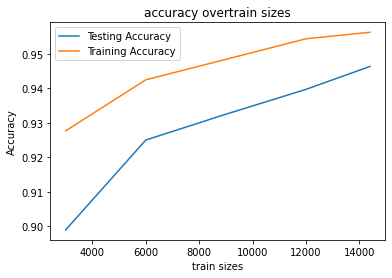

In [124]:
import random
def sample_dataset(X_train,y_train, select_size: int) -> np.array:
    #changed parameter to X_train and y_train which is the training set
    """
    Randomly sample a certain size of the dataset
    
    :param select_size: the return size of dataset
    :return: random subset of dataset
    """
    sample_num=select_size
    sample_list=[i for i in range(len(X_train))]
    sample_list=random.sample(sample_list,sample_num)                               #randomly choose the index of the datas and store the chosen data in the new X,y trainset
    X_train=X_train[sample_list]
    y_train=y_train[sample_list]
    # print(len(X_train))
    # print(len(y_train))
    return X_train,y_train
# sample_dataset(X_train,y_train, select_size=3000)

def knn_experiment(X_train, X_test, y_train, y_test,train_size) -> List[Tuple[float, float]]:
    """
    Run mnist knn experiment of varying training size
    
    :param : X_train, X_test, y_train, y_test,train_size
    :return: list of train and test accuracies of the modeles
    """
    accuracy=[]
    model=KNeighborsClassifier(n_neighbors=13)
    for i in train_size:                                                      #find the accuracy for trainset and testset for different train set size
        X_train1,y_train1=sample_dataset(X_train,y_train, select_size=i)
        model.fit(X_train1,y_train1)
        train_accuracy=accuracy_score(y_train1,model.predict(X_train1))
        test_accuracy=accuracy_score(y_test,model.predict(X_test))
        accuracy.append([train_accuracy,test_accuracy])
    return accuracy
    
data=read_mnist_data(file_path='C:/Users/dell/Desktop/CS506hw2/mnist_data.npy')
labels=read_mnist_data(file_path='C:/Users/dell/Desktop/CS506hw2/mnist_labels.npy')
X_train, X_test, y_train, y_test= train_test_split(data,labels,test_size=0.2)

train_size=[3000,6000,9000,12000,14400]
accuracy=(knn_experiment(X_train, X_test, y_train, y_test,train_size))    
# print(accuracy) 
# print(accuracy[1][0])

def plot_accuracies_over_train_sizes(accuracies: List[Tuple[float, float]], train_sizes: List[float]):
    """
    Plot the accuracies over training size
    
    :param accuracies: list of train and test accuracies of the model
    :param train_sizes: the list of training sizes in the experiment
    :return: plot the graph of relationship between train sizes and accuracy
    """
    test_accuracies=[]
    train_accuracies=[]
    for i in range (len(accuracies)):                               #plot the graph with train and test accuracy and train size                                          
        test_accuracies.append(accuracies[i][1])
        train_accuracies.append(accuracies[i][0])
    plt.title('accuracy overtrain sizes')
    plt.plot(train_sizes, test_accuracies, label = 'Testing Accuracy')
    plt.plot(train_sizes, train_accuracies, label = 'Training Accuracy')
    plt.legend()
    plt.xlabel('train sizes')
    plt.ylabel('Accuracy')
    plt.show()
plot_accuracies_over_train_sizes(accuracies=accuracy,train_sizes=train_size)

f) \[2 pts.\] Give a few bullet points explaining the pros and cons of these algorithms and when and why we use logistic regression over linear regression.

KNN:  

pros:simple and intuitive algorithm, no assumptions made  
  
cons:comparatively slow, need to choose an optimal number of neighbors

linear regression:  

pros:computational efficiency(computational speed is fast), interpretablility of the output  

cons:over-simplisitic, linear assumption(assume the relationship is linear),affected by outliers

logistic regression:  

pros:easy to implement,interpret and efficient yo train, makes no assumptions about distributions of classes in feature sapce, less sensative to outliers 

cons:If the number of observations is lesser than the number of features, it may lead to overfitting  


logic regression is used to handle classification and provide discreet output and less sensative to outliers than linear regression

### PCA - Dimensionality Reduction

The original dataset contains 28 ∗ 28 = 784 features. Therefore, we will try to reduce the dimension by using PCA.

a) \[1 pt.\] Perform PCA decomposition, initially using all principal components. Before performing PCA you usually need to mean-center the data, [see here why](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html), which means you have to calculate the mean of each variable (column) and subtract it from the respective column. However, many libraries perform this step implicitly, so consult the documentation of the library you are going to use (e.g. PCA of Sklearn).

In [125]:
from sklearn.decomposition import PCA
def pca_decomposition(dataset, num_components: [int]=None) -> np.array:
    """
    Perform PCA decomposition over mnist dataset
    
    :param dataset: mnist dataset in numpy format
    :param num_components: number of components to reduce to. If None, use all of components
    :return: the decomposed version of the input dataset
    """
    if(num_components!=None):
        dataset=dataset[:,:num_components]                      #use PCA from sklearn which contains the step of centering the data
    # print(np.shape(dataset))
    # pca = PCA(n_components=2)
    pca=PCA()
    dataset=pca.fit_transform(dataset)
    return dataset

In [126]:
pca_decomposition(data, num_components=4)

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

b) [2 pts.] Plot the CDF of the explained variance as a function of the number of principal components.


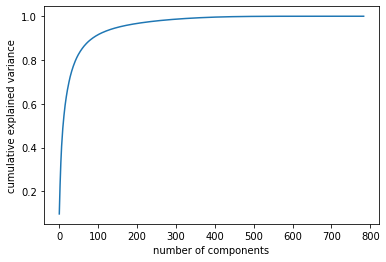

In [127]:
def plot_pca_cdf(dataset):
    """
    Plot CDF of explained variance as a function of number of principal components
    
    :param: dataset
    :return: the graph
    """
    pca=PCA().fit(dataset)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))                      #plot the cumulate sum of the explained_variance_ratio_ function in sklearn
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

plot_pca_cdf(data)   

c) [1 pt.] Choose a number of principal components to use by arguing why your choice is reasonable as a trade-off between the number of components used and classification performance. Afterwards, train a kNN classifier (choose a k that gave you the best results in Problem 2c.) and report train and test accuracy.


In [128]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
def knn_classify_mnist_with_pca(dataset, labels, k: int, num_components: int) -> Tuple[float, float]:
    """
    Classify mnist dataset with K-nearest neighbor
    
    :param dataset,lables: mnist dataset from 2(a) stored as data and label
    :param k: number of nearest neighbors
    :param num_components: number of components to keep after PCA
    :return: train and test accuracy of the model
    """
    data=pca_decomposition(dataset,num_components=num_components)
    # print(np.shape(data))
    # print(np.shape(labels))
    X_train, X_test, y_train, y_test= train_test_split(data,labels,test_size=0.2)                               #first decompose the data and then train model
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    X_train_predict=model.predict(X_train)
    X_test_predict=model.predict(X_test)
    train_accuracy=accuracy_score(y_train,X_train_predict)                                                       #find the accuracy using accuracy_score in sklearn
    test_accuracy=accuracy_score(y_test,X_test_predict)
    return train_accuracy,test_accuracy
    

In [129]:
data=read_mnist_data(file_path='C:/Users/dell/Desktop/CS506hw2/mnist_data.npy')
labels=read_mnist_data(file_path='C:/Users/dell/Desktop/CS506hw2/mnist_labels.npy')
print(knn_classify_mnist_with_pca(data,labels,k=13,num_components=650))
print(knn_classify_mnist_with_pca(data,labels,k=13,num_components=400))

(0.95375, 0.9419444444444445)
(0.9015277777777778, 0.8891666666666667)


d) [5 pts.] For this part we will perform the following experiment: First, randomly sample a part of your dataset (using a fixed k and all features), of size ranging from 3,000 to 21,000 (the whole dataset) in increments of 3,000. Fit a kNN classifier and plot the running time.
Now, use a fixed k and all samples of your dataset, but fit a kNN classifier using a varying number of Principal Components, ranging from 50 to 750 in increments of 100. Plot the running time on the same plot as above.

Describe the plot. What seems to affect -as a trend- the fitting time more? Number of samples used for trying, or the dimensions of the data?

-Python’s time package may be useful for this problem.


In [130]:
import time
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
def train_size_experiment(X_train, X_test, y_train, y_test, k: int,train_sizes: List[float]) :
    """
    Experiment classifying mnist with different training size
    
    :param : X_train, X_test, y_train, y_test from 2(a) ,k=13 which is the best k value founded in 2(c), train_sizes which is a list of numbers of train size
    :return: running time and accuracy (trainset accuracy and testset accuracy) for each train size
    """
    model=KNeighborsClassifier(n_neighbors=k)
    running_time=[]
    accuracies=[]
    for i in  train_size:                                             #use the time() function from time in sklearn to  calculate the running time of the function
        start=time.time()                                              #use end time-start time to calculate running time 
        X_train1,y_train1=sample_dataset(X_train,y_train, select_size=i)
        model.fit(X_train1,y_train1)
        # X_train_predict=model.predict(X_train)
        X_test_predict=model.predict(X_test)
        end=time.time()
        # train_accuracy=accuracy_score(y_train,X_train_predict)
        test_accuracy=accuracy_score(y_test,X_test_predict)             #find the test accuracy for each train size
        # end=time.time()
        running_time.append(end-start)
        # accuracies.append([train_accuracy,test_accuracy])
        accuracies.append(test_accuracy)
    return running_time,accuracies
data=read_mnist_data(file_path='C:/Users/dell/Desktop/CS506hw2/mnist_data.npy')
labels=read_mnist_data(file_path='C:/Users/dell/Desktop/CS506hw2/mnist_labels.npy')
X_train, X_test, y_train, y_test= train_test_split(data,labels,test_size=0.2)

train_size=[3000,6000,9000,12000,14400]
running_time1,accuracy1=train_size_experiment(X_train, X_test, y_train, y_test, k=13,train_sizes=train_size) 
# print(running_time1,accuracy1)

def num_component_experiment(data, k: int,num_components: List[int]) :
    """
    Experiment classifying mnist with different number of top principal components
    
    :param : data which is from 2(a), k=13 which is the best k value founded in 2(c), num_components which is the list of numbers of components
    :return: running time and accuracy (trainset accuracy and testset accuracy) for each train size
    """
    model=KNeighborsClassifier(n_neighbors=k)
    running_time=[]
    accuracies=[] 
    for i in [50,150,250,350,450,550,650,750]:                                                                  
        # start=time.time()
        # print(i)
        data1=pca_decomposition(data,num_components=i)                                                        #similar as above function of calculating running time
        X_train, X_test, y_train, y_test= train_test_split(data1,labels,test_size=0.2)
        # print(np.shape(X_train))
        start=time.time()
        model.fit(X_train,y_train)
        # X_train_predict=model.predict(X_train)
        X_test_predict=model.predict(X_test)
        end=time.time()
        # train_accuracy=accuracy_score(y_train,X_train_predict)
        test_accuracy=accuracy_score(y_test,X_test_predict)
        # end=time.time()
        running_time.append(end-start)
        # accuracies.append([train_accuracy,test_accuracy])
        accuracies.append(test_accuracy)
    return running_time,accuracies
num_component=[50,150,250,350,450,550,650,750]
running_time2,accuracy2=num_component_experiment(data, k=13,num_components=num_component) 
# print(running_time2,accuracy2)

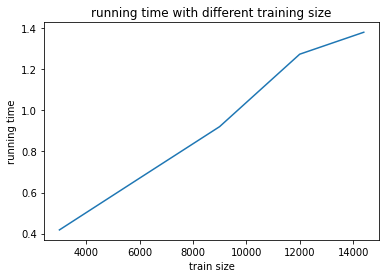

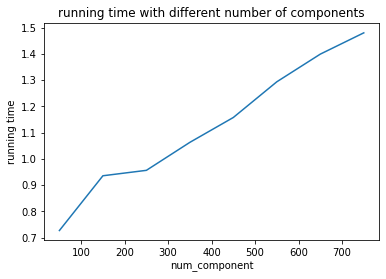

In [131]:
plt.title('running time with different training size')
plt.plot(train_size, running_time1)
plt.xlabel('train size')
plt.ylabel('running time')
plt.show()

plt.title('running time with different number of components')
plt.plot(num_component, running_time2)
plt.xlabel('num_component')
plt.ylabel('running time')
plt.show()

#describe the graph:
#size of training set influences the running time more.
# The graph of runningtime with different training size , as training size increases, running time increases in a straight line up
# The graph of runningtime with different component number , as component number increases, running time decreases and then increases and keep repeating

e) [3 pts.] Using your results from the previous question, produce the most accurate model you can on the condition that it is faster than 50% of the models you tested. List the values chosen for: k, number of samples, and number of principal components. How does this model compare to your most accurate model (the best model you created when time wasn’t a factor)?


k=13 as stated in 2a that when k=13 the accuracy of trainingset and testingset is both at a high rate

number of samples=9000 which as shown in the graph of 2e that the accuracy of trainingset and testingset both first increased rapidly and then increased slowly as the number of samples increased and 9000 is the turning point for both accuracy. Also as shown above, when number of samples=9000, running time is only about 0.9 which is faster than 50% of the models
   
number of components=400, as tested in 3c, when number of components is 650, the accuracy is 0.95 which is really high. But as shown on the above graph, when number of components=650, running time is 1.35 which is slower than most models, so and we need to make it faster than 50% of the models, I made trade off between accuracy and running time, and choose the number of components=400, which still have a comparatively high accuracy but a much faster running time.

  
As obvious, this model's accuracy will be slightly smaller than the best model's accuracy. However, it's only slightly smaller and we same nearly half running time and which is a successful trade off between accuracy and running time.

f) [1 pt.] Bonus point: Plot the images of the 10 first Principal Components. That is, plot the image approximation using each principle component.

In [ ]:
def plot_components(data,top_components: int):
    """
    Plot top 10 principal components
    
    :param top_components: number of top components to plot
    :return: 
    """
    pca=PCA(top_components)
    pca.fit(data)
    data=pca.transform(data)
    data_inverted = pca.inverse_transform(data)
    img_compressed = (np.dstack(data_inverted)).astype(np.uint8)
    plt.imshow(img_compressed)
plot_components(data,top_components=10)